In [1]:
import mlflow.pyfunc
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('../data/elecNormNew.csv')

In [3]:
df = df[['nsw_price', 'nsw_demand', 'victorian_price', 'victorian_demand']]
df.head()

nsw_price  nsw_demand  victorian_price  victorian_demand
0   0.056443    0.439155         0.003467          0.422915
1   0.051699    0.415055         0.003467          0.422915
2   0.051489    0.385004         0.003467          0.422915
3   0.045485    0.314639         0.003467          0.422915
4   0.042482    0.251116         0.003467          0.422915

In [4]:
# change `first_model/` to where you saved your model in level1/
loaded_model = mlflow.pyfunc.load_model('first_model/')
loaded_model

In [5]:
preds = loaded_model.predict(df)

drift detected for col nsw_price at index 767
drift detected for col nsw_price at index 1279
drift detected for col nsw_price at index 1311
drift detected for col nsw_price at index 1439
drift detected for col nsw_price at index 1535
drift detected for col nsw_price at index 1887
drift detected for col nsw_price at index 2015
drift detected for col nsw_price at index 3935
drift detected for col nsw_price at index 3999
drift detected for col nsw_price at index 4031
drift detected for col nsw_price at index 4319
drift detected for col nsw_price at index 8479
drift detected for col nsw_price at index 8735
drift detected for col nsw_price at index 8831
drift detected for col nsw_price at index 8863
drift detected for col nsw_price at index 9279
drift detected for col nsw_price at index 14879
drift detected for col nsw_price at index 14911
drift detected for col nsw_price at index 14943
drift detected for col nsw_price at index 15007
drift detected for col nsw_price at index 15583
drift det

drift detected for col victorian_demand at index 33247
drift detected for col victorian_demand at index 33279
drift detected for col victorian_demand at index 33887
drift detected for col victorian_demand at index 33919
drift detected for col victorian_demand at index 34079
drift detected for col victorian_demand at index 34111
drift detected for col victorian_demand at index 34463
drift detected for col victorian_demand at index 34751
drift detected for col victorian_demand at index 34847
drift detected for col victorian_demand at index 34943
drift detected for col victorian_demand at index 35615
drift detected for col victorian_demand at index 35839
drift detected for col victorian_demand at index 36191
drift detected for col victorian_demand at index 36287
drift detected for col victorian_demand at index 36799
drift detected for col victorian_demand at index 36863
drift detected for col victorian_demand at index 37087
drift detected for col victorian_demand at index 37151
drift dete

In [6]:
preds

nsw_price  nsw_demand  victorian_price  victorian_demand
0          False       False            False             False
1          False       False            False             False
2          False       False            False             False
3          False       False            False             False
4          False       False            False             False
...          ...         ...              ...               ...
45307      False       False            False             False
45308      False       False            False             False
45309      False       False            False             False
45310      False       False            False             False
45311      False       False            False             False

[45312 rows x 4 columns]

In [7]:
import matplotlib.pyplot as plt
def plot_feature(feature, drifts):
    assert isinstance(drifts, pd.Series)
    for idx, val in drifts.iteritems():
        if val:
            plt.axvline(x=idx,color='red',linestyle='--')
    feature.plot()

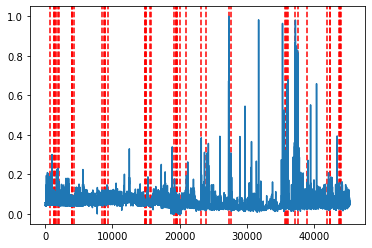

In [8]:
plot_feature(df.nsw_price, preds.nsw_price)

---------------
### WARNING : calling .predict updates the model internals. Make sure to call it only once